In [2]:
%display latex

In [3]:
l = var("l", latex_name="\\lambda")

p = matrix(
    SR,
    [
        [var(f"r_{j}{i}" if i < 3 else f"t_{j}") for i in range(1, 4)]
        for j in range(1, 4)
    ],
)
p

[r_11 r_12  t_1]
[r_21 r_22  t_2]
[r_31 r_32  t_3]

In [4]:
u = vector([var("u"), var("v"), var("psif", latex_name=r"\psi(\rho)")])
u

(u, v, psif)

In [5]:
X = vector([var("X"), var("Y"), 1])
X

(X, Y, 1)

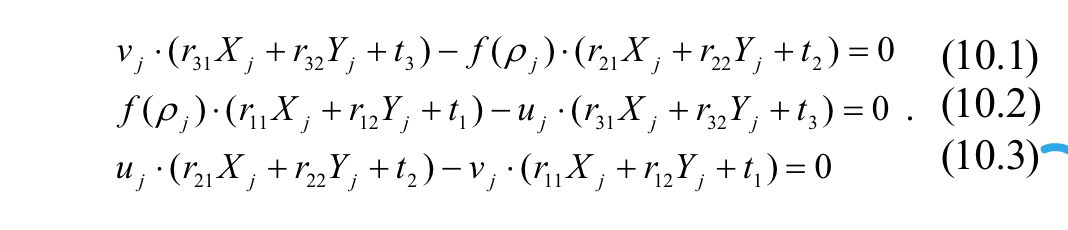

In [14]:
eqs = u.cross_product(p * X)
for el in eqs:
    display(el == 0)

-(X*r_21 + Y*r_22 + t_2)*psif + (X*r_31 + Y*r_32 + t_3)*v == 0

(X*r_11 + Y*r_12 + t_1)*psif - (X*r_31 + Y*r_32 + t_3)*u == 0

(X*r_21 + Y*r_22 + t_2)*u - (X*r_11 + Y*r_12 + t_1)*v == 0

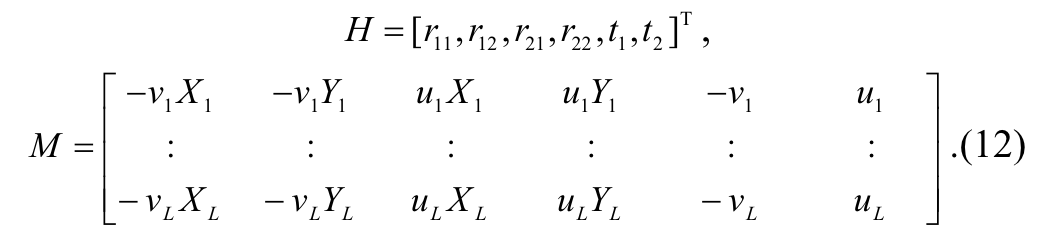

In [27]:
unknowns = p[:2, :2].list() + p[:2, 2].list()
unknowns

[r_11, r_12, r_21, r_22, t_1, t_2]

In julia, I have the following code (X is board coordinate system, x is image coordinates)

```julia
f(x, X) = [-x[2] * X[1], -x[2] * X[2], x[1] * X[1], x[1] * X[2], -x[2], x[1]]
```

In [38]:
[eqs[2].coefficient(unk) for unk in unknowns]

[-X*v, -Y*v, X*u, Y*u, -v, u]

In [37]:
for unk in unknowns:
    print(f"coef for {unk}: {eqs[2].coefficient(unk)}")

coef for r_11: -X*v
coef for r_12: -Y*v
coef for r_21: X*u
coef for r_22: Y*u
coef for t_1: -v
coef for t_2: u


Instead, in matlab code we have

```matlab
A=[Xt.*Ypt, Yt.*Ypt, -Xt.*Xpt, -Yt.*Xpt, Ypt, -Xpt];

%    [V,D]=eig(A'*A);
[U,S,V] = svd(A);

%Solving for computing the scale factor Lambda
R11=V(1,end);
R12=V(2,end);
R21=V(3,end);
R22=V(4,end);
T1=V(5,end);
T2=V(6,end);

```

In [25]:
p_ = matrix.identity(3)
p_[2, 2] = 3
p_

[1 0 0]
[0 1 0]
[0 0 3]